# Now Insurance Loss Runs #
## automatic extraction of relevant information in loss reports from pdf files ##

In [1]:
## load depedencies 
import lossrun
import matplotlib.pyplot as plt

## Pre-processing ##

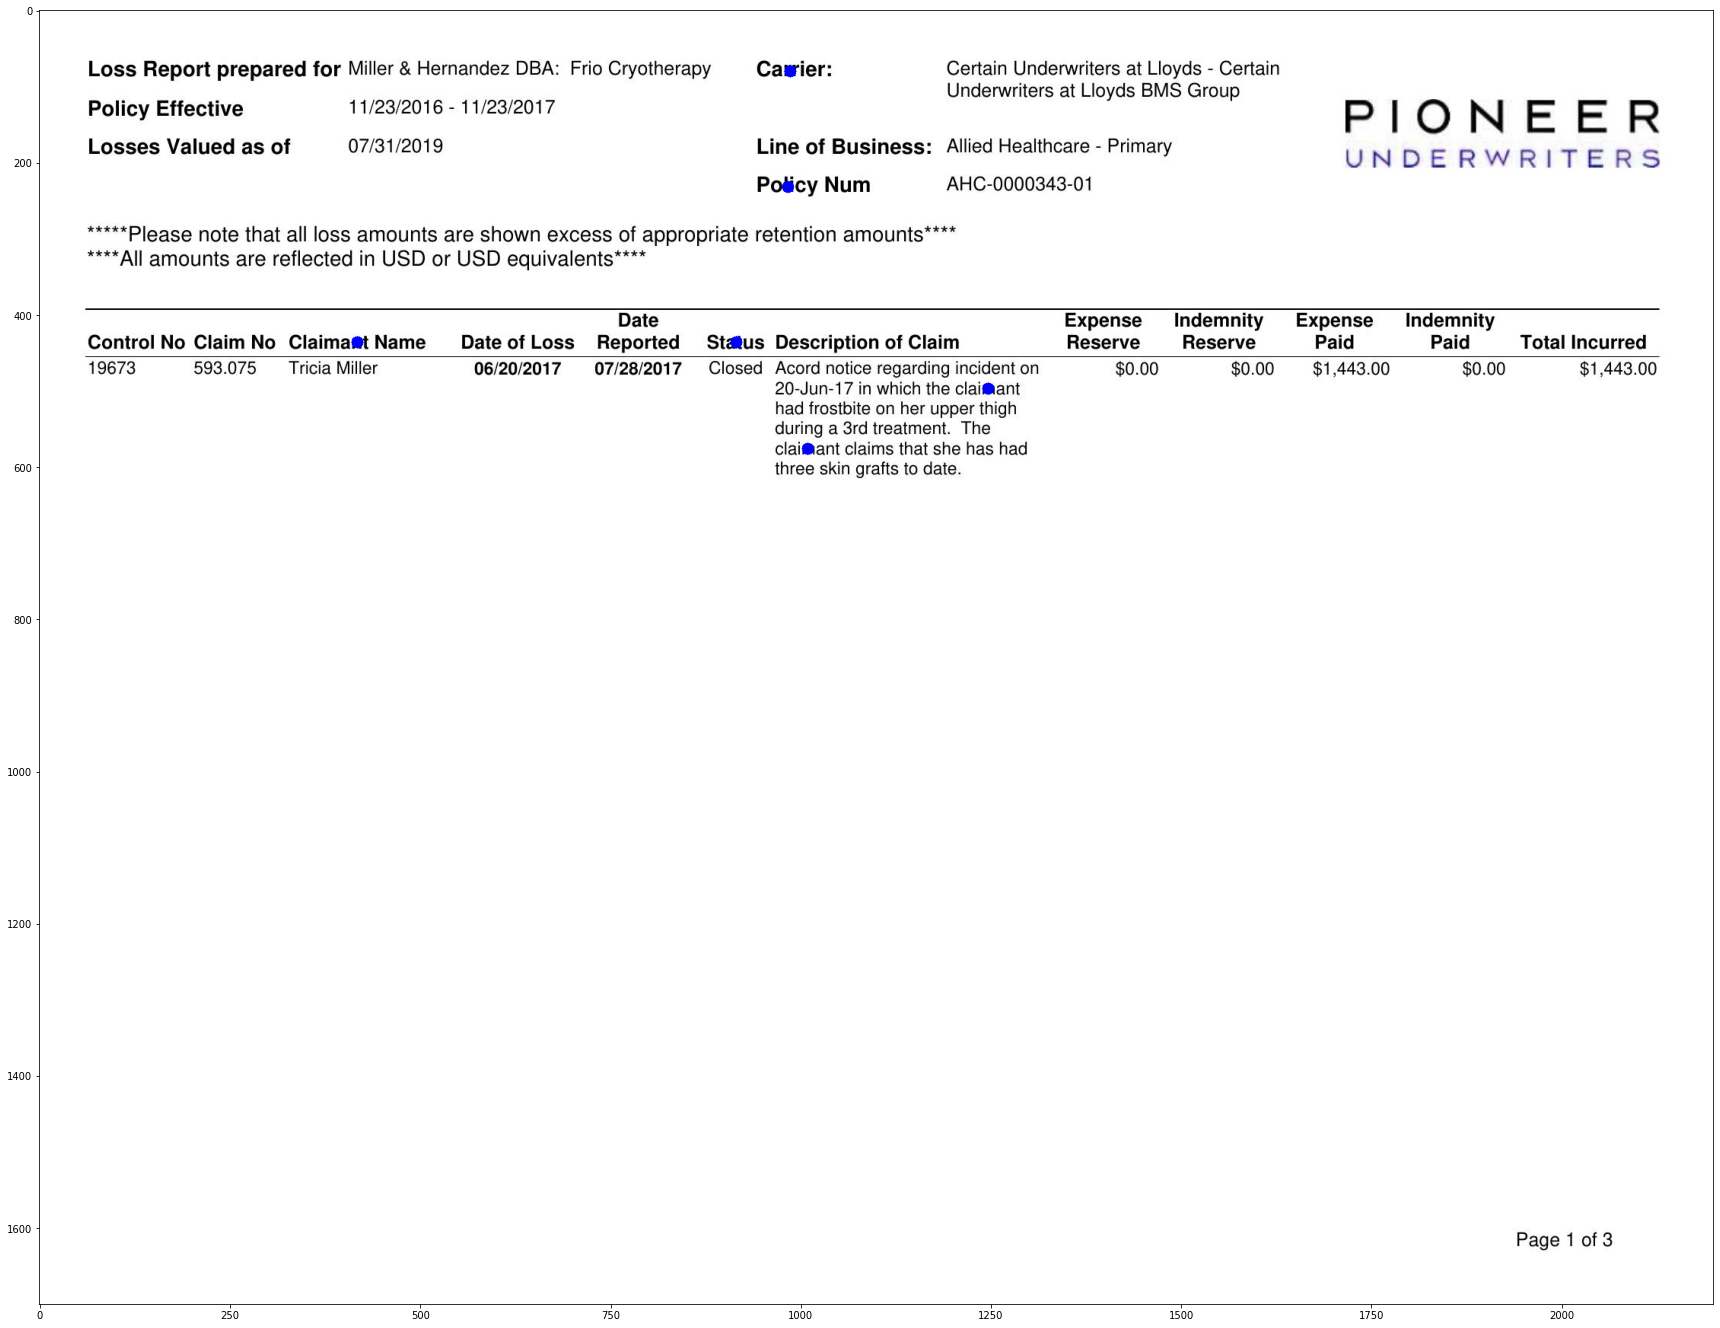

In [2]:
## Select file


# pdf raw file no ext 
#__________________________________________
pdf_file = 'AHC-0000343 loss runs PIO-YES0'
#___________________________________________

#__________________________________________
#pdf_file = 'knox_medex_loss_runs_attain_4 FIR-NO1'
#___________________________________________

#__________________________________________
#pdf_file = 'SampleIndMMPR1'
#___________________________________________


# topic files
topic_file = 'config_topics_beta.ino'
# Pre proc data
txt_dict, image_c, image, topics = lossrun.pre_proc(pdf_file, 'data', topic_file)

# vizualizate data
plt.figure(figsize=(30,30))
# Orignial data
plt.imshow(image_c)
# Orignial data

## Spatial relation filter ##

In [3]:
## load topics

# search topics in data pre - proc
spatial_filter = lossrun.spatial_filter(txt_dict, topics)
spatial_filter_topics = len(spatial_filter)

for topic in range(spatial_filter_topics):
# data ver
    print('SEARCHING TOPIC: ' + topics[topic][0])
    print('In: ' + ' '.join(spatial_filter[topic]) )
    print('.'*100 + '\n')

SEARCHING TOPIC: insurer
In: i Line of  Policy Num retention Status Description Closed Acord notice    20-Jun-17  had frostbite  during a  claimant  three skin Certain Underwriters at Lloyds - Certain  Underwriters at Lloyds BMS Group
....................................................................................................

SEARCHING TOPIC: policy_num
In: retention Status Description Closed Acord    20-Jun-17  had frostbite  during  claimant  three Num AHC-0000343-01
....................................................................................................

SEARCHING TOPIC: claimant
In: No No 593.075 Tricia Miller DateofLoss Reported Status Description of Claim Reserve Reserve Paid Paid Total Incurred
....................................................................................................

SEARCHING TOPIC: claimant
In: her upper thigh The that she has had to date.
..........................................................................................

## Name entity recognition ##

In [25]:
import spacy 

from configobj import ConfigObj

# load custom NER model
#nlp = spacy.load('./data/results/')

# load UBM NER model
nlp = spacy.load('en_core_web_sm')

# topic rules
ner_rules = ConfigObj('config_rules_beta.ino')


#
for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    doc = nlp(string)
    #displacy.serve(doc, style= 'ent')

    for j in range(len(ner_rules[topics[i][0]])):
        
        for ent in doc.ents:
            
            #if ent.label_ == ner_rules[topics[i][0]]:
        
            print(topics[i][0], ent.text, ner_rules[topics[i][0]], ent.label_)
    
            #print()

insurer 20-Jun-17 ['ORG'] CARDINAL
insurer three ['ORG'] CARDINAL
insurer Lloyds BMS Group ['ORG'] ORG
policy_num 20-Jun-17 ['CARDINAL'] CARDINAL
policy_num three ['CARDINAL'] CARDINAL
policy_num Num AHC-0000343-01 ['CARDINAL'] ORG
claimant Tricia Miller ['PERSON', 'ORG'] PERSON
claimant Tricia Miller ['PERSON', 'ORG'] PERSON
claimant three ['PERSON', 'ORG'] CARDINAL
claimant three ['PERSON', 'ORG'] CARDINAL


## Contextual analysis

In [5]:
# Call the model 
model = lossrun.load_context_model()

In [6]:
similar = []
try:
    similar.append(model.most_similar_to_given('ORG', txt_dict['text']))
except: 
    similar.append('0')

similar

['0']

In [7]:
# test cell ignore it
###############################


# check topic
_topic = 'REPORT'

relates_words_index = []

rate_relation = -1 # where grammar  correlation goes to -1 to 1 

for i in txt_dict['text']:

    try:
        relates_words_index.append(model.similarity(_topic, i))
    except:
        relates_words_index.append(0)
#model.similarity()
for index, relate_rate in enumerate(relates_words_index):

    if (relate_rate > .2):
        #print(index)
        print(txt_dict['text'][index])

Loss
Report
PIONEER
UNDERWRITERS
Date
Claim
Reported
Status
Description
Claim
Paid
Paid
Incurred
Closed
